## Activity 4 - Classifying Fashion with CNN
Fashion MNIST - An MNIST-like dataset of 70,000 28x28 labelled fashion images

In this activity, we will learn:<br>
* Fashion-MNIST Dataset 
* Load and preprocess the dataset
* Split the dataset for training and testing
* Define, compile and train a simple CNN model
* Evaluate the model
* Improving the model with hidden CNN layers



### Import libraries and dataset



Fashion-MNIST Dataset
In this activity, we will use the same fashion-MNIST dataset.  Instead of using a regular deep neural network, we will use a Convolution Neural Network instead.

Load up the necessary libraries and the Fashion-MNIST dataset.

In [ ]:
from keras import models
from keras import layers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import regularizers

# Load the MNIST data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)
print('train_labels shape:', train_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
train_images shape: (60000, 28, 28)
test_images shape: (10000, 28, 28)
train_labels shape: (60000,)


Running the above loads the dataset and prints the shape of the input and output components of the train, test and train labels and test splits of images.

The images are grayscale with a black background (0 pixel value) and the handwritten digits in white (pixel values near 255).  The images are easier to review when we reverse the colours and plot the background as white and the handwritten digits in black

Label = 0


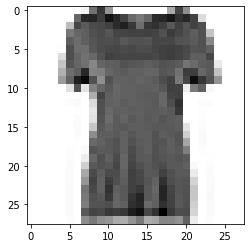

In [ ]:
#Display a sample
extract_image = 10
digit = train_images[extract_image]
label = train_labels[extract_image]
print("Label =",label)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Pre-process dataset


Unlike the previous activity, for CNN, we will process the image in 2D.  We will reshape the 2D images into a 3D array of images.  Due to all the weights computation, we will need to normalise the pixel value by dividing them by 255.

In [ ]:
# Process the data for the usage of CNN
train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Create the network




Now we are ready to define our neural network.

We first add a **Conv2D** layer with 32 filters, kernel size of 3 x 3.  We use the ‘relu’ activation function.  

Next, we **flatten()** the output before passing to the final Dense layer. Ref: https://keras.io/api/layers/convolution_layers/convolution2d/ https://keras.io/api/layers/reshaping_layers/flatten/ 
 
We then compile the network, specifying the optimizer, loss and metrics.

Type the following block of code in the next code block to create the network.

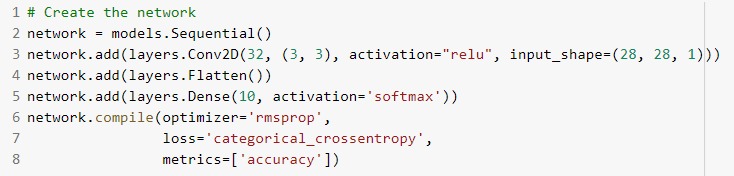


In [ ]:
#
#[ENTER YOUR CODE HERE]
#

### Train the network


Now we’re ready to train the model. Keras models its syntax on scikit-learn, so its training function is also called **fit()**.

First, we pass in the training data and the matching answers for each training example. Then we have several parameters that we can control: 
* **epochs** is how many times we will loop through the entire training dataset before ending the gradient descent training process. 
*	**batch_size** controls how many training examples are considered at once during each gradient descent update pass. 

In [ ]:
history = network.fit(train_images, train_labels, validation_split=0.2, epochs=5, batch_size=128, verbose=2)

Epoch 1/5
375/375 - 1s - loss: 0.2097 - accuracy: 0.9271 - val_loss: 0.2849 - val_accuracy: 0.9033
Epoch 2/5
375/375 - 1s - loss: 0.1985 - accuracy: 0.9305 - val_loss: 0.2876 - val_accuracy: 0.9026
Epoch 3/5


KeyboardInterrupt: ignored

### Evaluate the network



After training, we can call the **evaluate()** function to have a feel of how our model perform

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=2)
print('test_acc:', test_acc)

313/313 - 0s - loss: 0.3166 - accuracy: 0.8864
test_acc: 0.8863999843597412


Using the history object returned from the fit() function, we can plot the accuracy and loss over the epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


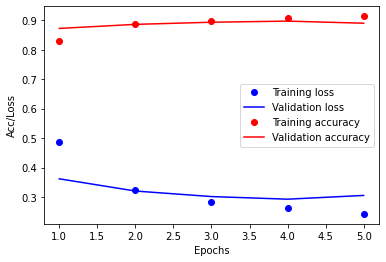

In [ ]:
# list all data in history
print(history.history.keys())

# Plot the Learning curve
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc/Loss')
plt.legend()
plt.show()

### Exercise


Can adding more convolution layers to improve the accuracy?  <br>How about adding more filters, changing kernel size, epochs, and other setting?

In [ ]:
#
#[ENTER YOUR CODE HERE]
#